In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../..')



In [50]:

import_df = pd.read_csv('../../data/hmda_lar/raw_data/2021_lar.txt'
                        , sep='|' 
                        , dtype = str
                        #, nrows=1000000
                        , index_col=False
                        #, skiprows=lambda x: x % 2
                        ) #nrows=12297121  , skiprows=lambda x: x % 2, dtype=type , converters=coverter , ,  na_values=na_value , low_memory=False, usecols = columns

import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26211431 entries, 0 to 26211430
Data columns (total 99 columns):
 #   Column                                    Dtype 
---  ------                                    ----- 
 0   activity_year                             object
 1   lei                                       object
 2   derived_msa_md                            object
 3   state_code                                object
 4   county_code                               object
 5   census_tract                              object
 6   conforming_loan_limit                     object
 7   derived_loan_product_type                 object
 8   derived_dwelling_category                 object
 9   derived_ethnicity                         object
 10  derived_race                              object
 11  derived_sex                               object
 12  action_taken                              object
 13  purchaser_type                            object
 14  preapproval     

In [51]:
#import_df = import_df.sample(frac=0.50)

### Data analysis using Pandas Profiling
https://github.com/ydataai/pandas-profiling




In [52]:

#profile = ProfileReport(import_df, minimal=True)
#profile.to_file(output_file="output.html")

# Note that minimal=True is used to limit the output due to the size of the dataset since a full report was crashing due to limited 32GB RAM memory.



In [53]:
#profile.to_notebook_iframe()

In [54]:
amv=import_df.groupby(by='action_taken', as_index=False).count().T #.melt(id_vars='loan_outcome')

Text(0, 0.5, 'Count')

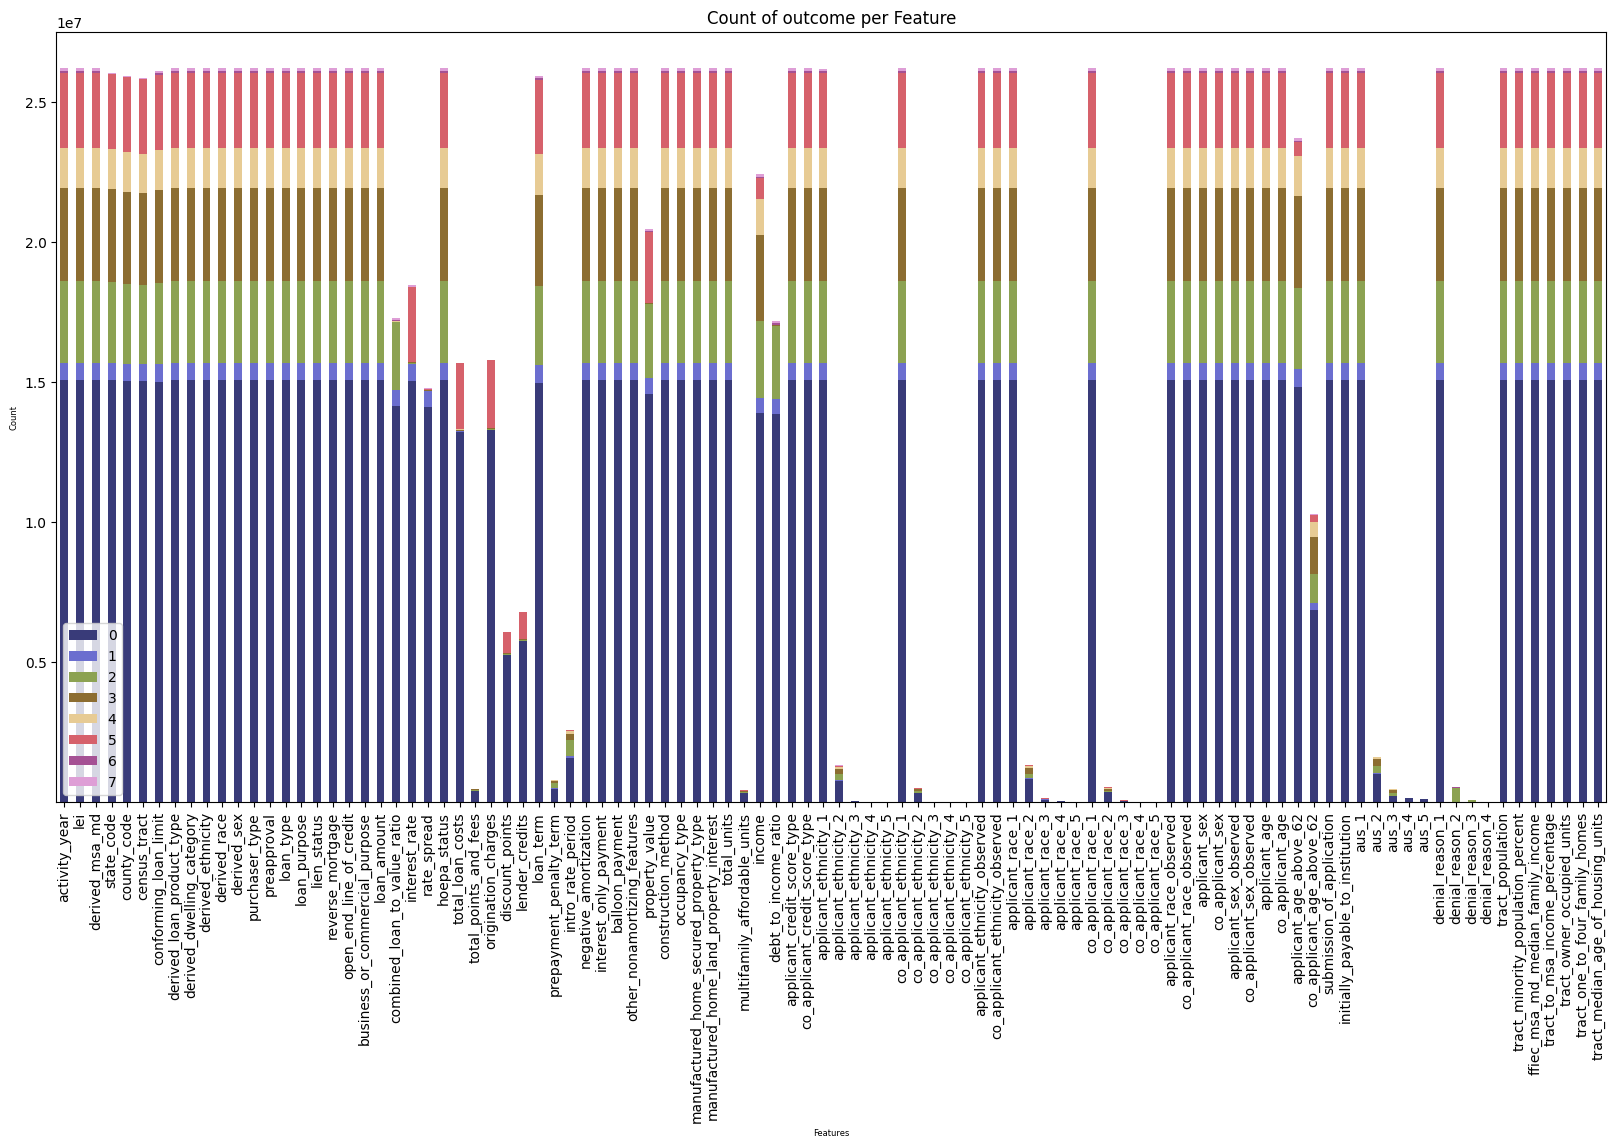

In [55]:


plt.rc('axes', labelsize=6)    # fontsize of the x and y label
amv.drop('action_taken').plot(kind='bar', 
                              stacked=True, 
                              figsize=(20,10),
                              colormap='tab20b'
                              )
plt.title('Count of outcome per Feature')
plt.xlabel('Features')
plt.ylabel('Count')


The following columns were added by the CFPB, and we're not using them. 
- derived_loan_product_type
- derived_dwelling_category
- derived_ethnicity
- derived_race
- derived_sex

removing observed race, ethinicity and sex as we intend to use reported data
- applicant_ethnicity_observed
- co_applicant_ethnicity_observed
- applicant_race_observed
- co_applicant_race_observed
- applicant_sex_observed
- co_applicant_sex_observed

Drop activity_year has constant value "2019"
applicant_ethnicity_5 has constant value "13"
co_applicant_ethnicity_5 has constant value "14"	

Keep census_tract but dropping 
- derived_msa_md has a high cardinality: 406 distinct values
- state_code has a high cardinality: 51 distinct values
- county_code has a high cardinality: 2979 distinct values

Keep these features with high cardinality 
- loan_amount has a high cardinality: 932 distinct values
- combined_loan_to_value_ratio has a high cardinality: 71418 distinct values
- interest_rate has a high cardinality: 1392 distinct values
- rate_spread has a high cardinality: 33838 distinct values
- total_loan_costs has a high cardinality: 274032 distinct values
- total_points_and_fees has a high cardinality: 3716 distinct values
- origination_charges has a high cardinality: 118470 distinct values
- discount_points has a high cardinality: 97316 distinct values
- lender_credits has a high cardinality: 85203 distinct values
- loan_term has a high cardinality: 277 distinct values
- intro_rate_period has a high cardinality: 60 distinct values
- property_value has a high cardinality: 1037 distinct values
- income has a high cardinality: 2698 distinct values
- tract_population has a high cardinality: 9318 distinct values
- tract_minority_population_percent has a high cardinality: 13569 distinct values
- ffiec_msa_md_median_family_income has a high cardinality: 294 distinct values
- tract_to_msa_income_percentage has a high cardinality: 362 distinct values
- tract_owner_occupied_units has a high cardinality: 3351 distinct values
- tract_one_to_four_family_homes has a high cardinality: 4321 distinct values
- tract_median_age_of_housing_units has a high cardinality: 74 distinct values

Dropping columns that are 95% of time concentrated into a single category

Dropping columns that have less then 5% of loans that were denied.

Dropping columns with more than 70% missing values
- total_points_and_fees has 980064 (98.0%) missing values
- discount_points has 789803 (79.0%) missing values
- lender_credits has 758988 (75.9%) missing values
- prepayment_penalty_term has 985135 (98.5%) missing values
- intro_rate_period has 840955 (84.1%) missing values
- multifamily_affordable_units has 984884 (98.5%) missing values
- applicant_ethnicity_2 has 952132 (95.2%) missing values
- applicant_ethnicity_3 has 999335 (99.9%) missing values
- applicant_ethnicity_4 has 999983 (> 99.9%) missing values
- applicant_ethnicity_5 has 999999 (> 99.9%) missing values
- co_applicant_ethnicity_2 has 980461 (98.0%) missing values
- co_applicant_ethnicity_3 has 999742 (> 99.9%) missing values
- co_applicant_ethnicity_4 has 999992 (> 99.9%) missing values
- co_applicant_ethnicity_5 has 999999 (> 99.9%) missing values
- applicant_race_2 has 964643 (96.5%) missing values
- applicant_race_3 has 997165 (99.7%) missing values
- applicant_race_4 has 999669 (> 99.9%) missing values
- applicant_race_5 has 999892 (> 99.9%) missing values
- co_applicant_race_2 has 985289 (98.5%) missing values
- co_applicant_race_3 has 998853 (99.9%) missing values
- co_applicant_race_4 has 999876 (> 99.9%) missing values
- co_applicant_race_5 has 999959 (> 99.9%) missing values
- aus_2 has 939652 (94.0%) missing values
- aus_3 has 974495 (97.4%) missing values
- aus_4 has 986279 (98.6%) missing values
- aus_5 has 986996 (98.7%) missing values
- denial_reason_2 has 978017 (97.8%) missing values
- denial_reason_3 has 996696 (99.7%) missing values
- denial_reason_4 has 999741 (> 99.9%) missing values

The HMDA Descriptor aids in understanding the multiple columns in the HMDA dataset and shows which columns are being dropped

In [56]:
hmda_Desc_df = pd.read_csv('../../data/hmda_lar/HMDA_Data_Descriptor_v2.csv' , dtype = str)
#columns, type, coverter, na_value = import_descriptor(hmda_Desc_df)

Columns being dropped from import

In [57]:
columns_to_drop = hmda_Desc_df['Field'][hmda_Desc_df['dtype']=='drop'].to_list()

In [58]:
#kept columns
existing_col = hmda_Desc_df['Field'][hmda_Desc_df['dtype']!='drop']

In [59]:
#Dropping features that are more than 95% concentrated around a single value or that are have than 70% missing data
for col in existing_col:
    den = import_df[col].value_counts(dropna=True).sum()
    num = import_df[col].value_counts(dropna=True).max()
    concentration_rate = num/den
    percent_missing = import_df[col].isnull().sum() / len(import_df)
    if  concentration_rate > 0.96 or percent_missing > 0.70:
        columns_to_drop.append(col)


In [60]:
for col in existing_col[existing_col!='action_taken']:
    num=amv.T[amv.T['action_taken']=='3'][col].sum()
    den=amv.T[col].sum()
    denied_rate = num/den
    if denied_rate< 0.05 and col not in columns_to_drop: # dropping column if there is less 5% of denied loans in that column
        columns_to_drop.append(col)

In [61]:
columns_to_drop

['activity_year',
 'derived_msa_md',
 'state_code',
 'county_code',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'other_nonamortizing_features',
 'applicant_ethnicity_2',
 'applicant_ethnicity_3',
 'applicant_ethnicity_4',
 'applicant_ethnicity_5',
 'co_applicant_ethnicity_2',
 'co_applicant_ethnicity_3',
 'co_applicant_ethnicity_4',
 'co_applicant_ethnicity_5',
 'applicant_ethnicity_observed',
 'co_applicant_ethnicity_observed',
 'applicant_race_2',
 'applicant_race_3',
 'applicant_race_4',
 'applicant_race_5',
 'co_applicant_race_2',
 'co_applicant_race_3',
 'co_applicant_race_4',
 'co_applicant_race_5',
 'applicant_race_observed',
 'co_applicant_race_observed',
 'applicant_sex_observed',
 'co_applicant_sex_observed',
 'applicant_age_above_62',
 'co_applicant_age_above_62',
 'preapproval',
 'reverse_mortgage',
 'total_points_and_fees',
 'discount_points',
 'lender_credits',
 'prepayment_penalty_term',
 'intro_rate

Creating new DF and deleting import_df to save memory

In [62]:
hmda_df = import_df.drop(columns_to_drop, axis=1)
lst = [import_df]
del import_df
del lst


In [63]:
hmda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26211431 entries, 0 to 26211430
Data columns (total 42 columns):
 #   Column                                    Dtype 
---  ------                                    ----- 
 0   lei                                       object
 1   census_tract                              object
 2   conforming_loan_limit                     object
 3   action_taken                              object
 4   purchaser_type                            object
 5   loan_type                                 object
 6   loan_purpose                              object
 7   lien_status                               object
 8   open_end_line_of_credit                   object
 9   business_or_commercial_purpose            object
 10  loan_amount                               object
 11  combined_loan_to_value_ratio              object
 12  hoepa_status                              object
 13  loan_term                                 object
 14  interest_only_pa

### 2. Dataframe cleaning

### Understanding the types of values each variable can take
Pandas Profiling shows columns with high cardinality. let's look further at them

In [64]:
""" df_types = pd.DataFrame(columns=['Col_name', 'value_range', 'count'])
exclude_cols = [ 'lei', 'state_code', 'county_code'] #, 'census_tract'
columns = [var for var in hmda_df.columns if var not in exclude_cols]
for col in columns:
    dd = hmda_df.groupby([col], as_index=False, dropna=False)['lei'].count().sort_values(by='lei', ascending=False)
    dd['Col_name'] = col
    if len(dd['lei'])<70000: # indicates how may values to limit the concatenation to
        dd.rename(columns={col: 'value_range', 'lei': 'count'}, inplace=True)
        df_types = pd.concat([df_types, dd])
df_types """

" df_types = pd.DataFrame(columns=['Col_name', 'value_range', 'count'])\nexclude_cols = [ 'lei', 'state_code', 'county_code'] #, 'census_tract'\ncolumns = [var for var in hmda_df.columns if var not in exclude_cols]\nfor col in columns:\n    dd = hmda_df.groupby([col], as_index=False, dropna=False)['lei'].count().sort_values(by='lei', ascending=False)\n    dd['Col_name'] = col\n    if len(dd['lei'])<70000: # indicates how may values to limit the concatenation to\n        dd.rename(columns={col: 'value_range', 'lei': 'count'}, inplace=True)\n        df_types = pd.concat([df_types, dd])\ndf_types "

Exporting list to .csv for inspection

In [65]:
#df_types.to_csv('../../data/hmda_lar/df_types.csv', index = False)

### 2.0. Filtering and Cleaning Outcomes
- 1: Loan originated
- 2: Application approved but not accepted (data not used)
- 3: Application denied
- 4: Application withdrawn by applicant (data not used)
- 5: File closed for incompleteness (data not used)
- 6: Purchased loan (data not used)
- 7: Preapproval request denied (data not used)
- 8: Preapproval request approved but not accepted (data not used)

#### New Outcomes:
- 0: Loans
- 1: Denials


In [66]:
### Clean Outcomes

conditions=[
    hmda_df['action_taken']=='1',    # Loan originated
    hmda_df['action_taken']=='3',    # Application denied
]

results = ['1',
            '0',
        ]

hmda_df['loan_outcome'] = np.select(conditions, results, np.nan) 
hmda_df['loan_outcome'].value_counts(dropna = False)


1      15063175
nan     8226915
0       2921341
Name: loan_outcome, dtype: int64

In [67]:
hmda_df.drop(columns=['action_taken'], axis=1, inplace=True)

In [68]:
hmda_df = hmda_df[(hmda_df['loan_outcome']=='0') | (hmda_df['loan_outcome']=='1')]
hmda_df['loan_outcome'].value_counts()

1    15063175
0     2921341
Name: loan_outcome, dtype: int64

### 2.1. Filtering Only Conventional Loans that were used for Home purchases
- 1: Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)
- 2: Federal Housing Administration insured (FHA)
- 3: Veterans Affairs guaranteed (VA)
- 4: USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)

...and for the purpose of Home Purchase (not Home improvement nor refinancing)
loan_purpose
- 1: Home purchase
- 2: Home improvement
- 31: Refinancing
- 32: Cash-out refinancing
- 4: Other purpose
- 5: Not applicable

In [69]:
hmda_df['loan_type'].value_counts(dropna=False)


1    14704180
2     1700352
3     1448937
4      131047
Name: loan_type, dtype: int64

In [70]:
hmda_df = hmda_df[(hmda_df['loan_type']=='1')]

In [71]:

hmda_df = hmda_df[(hmda_df['loan_purpose']=='1')]

In [90]:
#removing both columns from the database
hmda_df.drop(columns=['loan_type', 'loan_purpose'],axis=1, inplace=True)

### 2.2. Transforming Race and Ethnicity into single column

To be able to understand the variety of people's origins, we need to look at both Race and Ethnicity simultaneously.
 Races can be: American Indian or Alaska Native, Asian, Asian Indian, Chinese, Filipino, Japanese, Korean, Vietnamese, Other Asian, Black or African American, Native Hawaiian or Other Pacific Islander, Native Hawaiian,
 Guamanian or Chamorro, Samoan, Other Pacific Islander or White.
 Ethnicity can be: Hispanic or Latino, Mexican, Puerto Rican, Cuban, Other Hispanic or Latino or Not Hispanic or Latino

For the purpose of simplifying the data we'll be categorizing the data into

- 1: Native American
- 2: Asian
- 3: Black
- 4: Pacific Islander
- 5: White
- 6: Latino
- 7: Race NA

In [ ]:
def clean_race_ethnicity(row):
    
   
    try:
        race = row['applicant_race_1']
        ethnicity = row['applicant_ethnicity_1']
    
    ### this is intended for co-applicants
    except KeyError:
        race = row['co_applicant_race_1']
        ethnicity = row['co_applicant_ethnicity_1']
    
   
    latinx = ['1', '11', '12', '13', '14']
    asian = ['2', '21', '22', '23', '24', '25', '26', '27']
    pac_islander = ['4', '41', '42', '43', '44']
    black = ['3']
    white = ['5']
    native = ['1']
    ethnicity_na = ['2', '3', '4', '000']
    race_na = ['6', '7', '-1', '000']
    
    ### Used for co-applicants
    ethnicity_nocoapp = ['5']
    race_nocoapp = ['8']
    
    
    ### Latino
    if ethnicity in latinx:
        return '6'
    ### Black
    elif ethnicity not in latinx and race in black:
        return '3'
    ### Asian
    elif ethnicity not in latinx and race in asian:
        return '2'
    ### Pacific Islander
    elif ethnicity not in latinx and race in pac_islander:
        return '4'
    ### Native
    elif ethnicity not in latinx and race in native:
        return '1'
    ### White
    elif ethnicity not in latinx and race in white:
        return '5'
    # Race NA
    elif ethnicity in ethnicity_na and race in race_na:
        return '7'
        
    ### No Co-Applicants: Where both are no co-applicants OR where just one is no co-applicant
    elif (ethnicity in ethnicity_nocoapp and race in race_nocoapp) or (race in race_nocoapp and ethnicity in ethnicity_na) or (ethnicity in ethnicity_nocoapp and race in race_na): 
        return '8'

In [72]:
app_race_eth_combinations = hmda_df[['applicant_race_1', 'applicant_ethnicity_1']].drop_duplicates()
### Apply clean_race_ethnicity function for the r/e dataframe
app_race_eth_combinations['app_race_ethnicity'] = app_race_eth_combinations.apply(clean_race_ethnicity, axis = 1)
### Drop Count Column
hmda_df = pd.merge(hmda_df, app_race_eth_combinations, how = 'left', on = ['applicant_race_1', 'applicant_ethnicity_1'])
print(hmda_df['app_race_ethnicity'].value_counts(dropna = False))
hmda_df.drop(columns=['applicant_race_1', 'applicant_ethnicity_1'],axis=1, inplace=True)

5       2727138
7        682231
6        502186
2        418057
3        270839
1         25136
4          6911
None        503
Name: app_race_ethnicity, dtype: int64


Considering only data samples with reported race/ethnicity

In [73]:
hmda_df = hmda_df[(hmda_df['app_race_ethnicity']!='7')]

### 2.3. Clean Co-applicant Race and Ethnicity
- 1: Native American
- 2: Asian
- 3: Black
- 4: Pacific Islander
- 5: White
- 6: Latino
- 7: Race NA
- 8: No Coapp

In [74]:
coapp_race_eth_combinations = hmda_df[['co_applicant_race_1', 'co_applicant_ethnicity_1']].drop_duplicates()
### Apply clean_race_ethnicity function for the r/e dataframe
coapp_race_eth_combinations['coapp_race_ethnicity'] = coapp_race_eth_combinations.apply(clean_race_ethnicity, axis = 1)
### Using clean_race_ethnicity function for the coapp r/e dataframe, it has a no co-app flag
coapp_race_eth_combinations['coapp_race_ethnicity'] = coapp_race_eth_combinations.apply(clean_race_ethnicity, axis = 1)

hmda_df = pd.merge(hmda_df, coapp_race_eth_combinations, how = 'left', 
                      on = ['co_applicant_race_1', 'co_applicant_ethnicity_1'])


#Removing original columns
hmda_df.drop(['co_applicant_race_1', 'co_applicant_ethnicity_1'],axis=1, inplace=True)

hmda_df['coapp_race_ethnicity'].value_counts(dropna = False)

8       2182151
5       1272439
6        194739
2        165286
3         71895
7         52013
1          9008
4          3065
None        174
Name: coapp_race_ethnicity, dtype: int64

again we're removing the samples where the coapplicant race/ethnicity is not reported

In [75]:
hmda_df = hmda_df[(hmda_df['coapp_race_ethnicity']!='7')]

### 2.3. Clean Sex by removing non-reported Sex

Considering only data samples with reported Sex for both Applicants and Co-applicants

In [76]:
hmda_df = hmda_df[(hmda_df['applicant_sex'] == '1') |
                  (hmda_df['applicant_sex'] == '2')]
# hmda_df['loan_outcome'].value_counts()


In [77]:
hmda_df = hmda_df[(hmda_df['co_applicant_sex'] == '1') |
                  (hmda_df['co_applicant_sex'] == '2') |
                  (hmda_df['co_applicant_sex'] == '5')
                  ]


### 2.4. Cleaning Credit Models
- 1: Equifax
- 2: Experian
- 3: TransUnion
- 4: Vantage
- 5: More than one
- 6: Other Model
- 7: Credit Na

In [78]:
condition=[
    ['1'],     #  equifax
    ['2'],     #  experian
    ['3'],     #  experian
    ['4'],     #  transunion
    ['5'],     #  transunion
    ['6'],     #  vantage
    ['7'],     #  more_than_one
    ['8'],     #  other_model
    ['9'],     #  other_model
    ['1111'],  #  credit_na
]

results = ['1',
            '2',
            '3',
            '3',
            '4',
            '4',
            '5',
            '6',
            np.nan,
            np.nan
        ]

hmda_df['applicant_credit_score_type'].replace(condition, results, inplace=True) 


hmda_df['applicant_credit_score_type'].value_counts(dropna = False)

1      1261485
3      1060537
2       868568
NaN     407218
5       135383
6       127865
4         6922
Name: applicant_credit_score_type, dtype: int64

### 2.5. Clean Debt-to-Income Ratio

In [79]:
# Creating an exempt feature for the debt-to-income ratio
#hmda_df['dti_exempt'] = hmda_df['debt_to_income_ratio'].apply(lambda x: 1 if x in ['Exempt'] else 0) 
#hmda_df['dti_exempt'] = np.where(hmda_df['debt_to_income_ratio']=='Exempt', 1, 0)

In [80]:
hmda_df['debt_to_income_ratio'].value_counts()

20%-<30%    775983
30%-<36%    687011
<20%        302317
42          153310
44          146150
41          144885
40          141255
39          140289
43          137202
38          134882
37          131509
36          126346
>60%        117675
49          108649
45          104975
48           90718
46           89676
50%-60%      88983
47           88062
Exempt       86297
Name: debt_to_income_ratio, dtype: int64

In [81]:

#remaining values are ok ['36', '37', '38', '39', '40', '41', '42','43', '44', '45', '46', '47', '48', '49']

condition=[('<20%'),
            ('20%-<30%'),
            ('30%-<36%'),
            ('50%-60%'),
            ('>60%'),
            ('Exempt')
            ]

results = ['20',
            '25',
            '33',
            '55',
            '65',
            np.nan]

hmda_df['debt_to_income_ratio'].replace(condition, results, inplace=True) 



In [82]:
hmda_df['debt_to_income_ratio'].value_counts(dropna=False)

25     775983
33     687011
20     302317
NaN    158101
42     153310
44     146150
41     144885
40     141255
39     140289
43     137202
38     134882
37     131509
36     126346
65     117675
49     108649
45     104975
48      90718
46      89676
55      88983
47      88062
Name: debt_to_income_ratio, dtype: int64

### 2.6. Cleaning Combine Loan-to-Value Ratio, Property value, loan_term

In [83]:
# Creating an exempt feature for the combined_loan_to_value_ratio
#hmda_df['clvr_exempt'] = hmda_df['combined_loan_to_value_ratio'].apply(lambda x: 1 if x in ['Exempt'] else 0) 
#hmda_df['clvr_exempt'] = np.where(hmda_df['combined_loan_to_value_ratio']=='Exempt', 1, 0)

In [84]:
#forcing the values to numbers, which will remove the exempt
#hmda_df['combined_loan_to_value_ratio'] = np.where(hmda_df['combined_loan_to_value_ratio']=='Exempt', '-2', hmda_df['combined_loan_to_value_ratio'])
cols = ['combined_loan_to_value_ratio', 'loan_term', 'property_value' ]
for var in cols:
    hmda_df[var] = hmda_df[var].apply(pd.to_numeric, errors='coerce')
    hmda_df[var] = hmda_df[var].replace({'0':np.NaN, 0:np.NaN,np.inf:np.NaN,-np.inf:np.NaN})
    #hmda_df[x] = hmda_df.x.astype('float')

### 2.8 Cleaning Conforming loan limit

In [85]:
condition=[('C'),   #Conforming
            ('NC'), #Nonconforming
            ('U'),  #Undetermined
            ('NA') #Not Applicable
            ]

results = ['1',
            '2',
            '3',
            '4']

hmda_df['conforming_loan_limit'].replace(condition, results, inplace=True) 



### 2.9 Cleaning Applicant/Coapplicant Age

In [86]:
#defyning the debt-to-income ratio according to...ADD HERE ADD HERE

#remaining values are ok ['36', '37', '38', '39', '40', '41', '42','43', '44', '45', '46', '47', '48', '49']

condition=[('<25'),
           ('25-34'),
           ('35-44'),
           ('45-54'),
           ('55-64'),
           ('65-74'),
           ('>74'),
           ('8888'),
           ('9999')
            ]

results = [20,
            30,
            40,
            50,
            60,
            70,
            80,
            np.nan,
            np.nan]

hmda_df['applicant_age'].replace(condition, results, inplace=True) 
hmda_df['co_applicant_age'].replace(condition, results, inplace=True) 

### 3. Exporting Dataframe for Storage

### 3. Exporting stage 1 file

In [91]:
hmda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3867978 entries, 0 to 3950769
Data columns (total 38 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   lei                                       object 
 1   census_tract                              object 
 2   conforming_loan_limit                     object 
 3   purchaser_type                            object 
 4   lien_status                               object 
 5   open_end_line_of_credit                   object 
 6   business_or_commercial_purpose            object 
 7   loan_amount                               object 
 8   combined_loan_to_value_ratio              float64
 9   hoepa_status                              object 
 10  loan_term                                 float64
 11  interest_only_payment                     object 
 12  property_value                            float64
 13  occupancy_type                            object 
 14  ma

In [88]:
hmda_df.to_csv('../../data/hmda_lar/cleaned_data/1_cleaned_hmda_2021_stage1_Full.csv', index = False)